# S1 vs S2 Conditional GAN

As mentioned before, s1 and s2 are important characteristics to correctly model. Therefore the following script will create a conditional GAN, using s1 for dark matter at 50KeV to 200KeV in 50KeV intervals. It trains on 50,100 and 150 KeV, then tests the accuracy on these three as well as 200, to check the ability to extrapolate. 

This is the most veratile code skeleton produced this semester for several reasons. 
1) We are teting the ability to extrapolate, and whether it can reproduce distributions at unseen energies. 

2) We are dynamically saving the distribution. This means even if the neural not gets 'kicked out' the optimal distribution, we will have saved the correct weighting of nodes.

The method used to calcaulate the accuracy is the find the sum of the absolute value of the differences between the G4 data and the generated data. The weights which minimise this are saved.


This is a library to access ROOT files, a format used in particle physics.

In [0]:
pip install uproot

     |████████████████████████████████| 122kB 3.3MB/s 
     |████████████████████████████████| 92kB 12.6MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/dark_matter_7_12_19

/content/gdrive/My Drive/dark_matter_7_12_19


Here we will extract some root files, most will be used to train the GAN, then one will be used to 'validate' the GAN.

Currently, we will use 50, 150, and 250 to train and 100 and 200 to validate.

In [0]:
import uproot
import pandas
import numpy as np
import matplotlib.pyplot as plt

tree50 = uproot.open("dark_matter_runs_50kev.root")["dstree"]
tree100 = uproot.open("dark_matter_100kev_v1.root")["dstree"]
tree150 = uproot.open("dark_matter_runs_150kev.root")["dstree"]
tree200 = uproot.open("dark_matter_runs_200kev.root")["dstree"]

These are the variables stored in the root file, created by the current monte carlo generator.

In [0]:
tree50.show()

ev                         (no streamer)              asdtype('>i4')
pdg                        (no streamer)              asdtype('>i4')
ene0                       (no streamer)              asdtype('>f4')
s1ene                      (no streamer)              asdtype('>f4')
s2ene                      (no streamer)              asdtype('>f4')
veto_visene                (no streamer)              asdtype('>f4')
mu_visene                  (no streamer)              asdtype('>f4')
vetoene                    (no streamer)              asdtype('>f4')
muene                      (no streamer)              asdtype('>f4')
tpcene                     (no streamer)              asdtype('>f4')
x                          (no streamer)              asdtype('>f4')
y                          (no streamer)              asdtype('>f4')
z                          (no streamer)              asdtype('>f4')
ene                        (no streamer)              asdtype('>f4')
r                          (no str

The Variable is input here to try to make the code reusable and as general as possible.

In [0]:
#VARIABLE
var1 = "s1"
var2 = "s2"

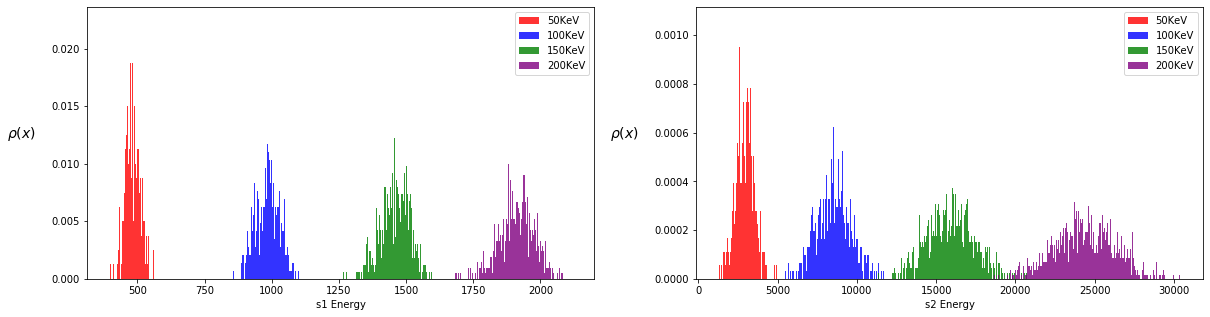

In [0]:
div1 = 200
div2 = 2200
rangemins1 = 0
rangemaxs1 = 2000
rangemins2 = 2000
rangemaxs2 = 22000
train_DS_s1ene_50 = np.array(tree50.array(f"{var1}"))/div1
train_DS_s1ene_100 = np.array(tree100.array(f"{var1}"))/div1
train_DS_s1ene_150 = np.array(tree150.array(f"{var1}"))/div1
train_DS_s1ene_200 = np.array(tree200.array(f"{var1}"))/div1

train_DS_s2ene_50 = np.array(tree50.array(f"{var2}"))/div2
train_DS_s2ene_100 = np.array(tree100.array(f"{var2}"))/div2
train_DS_s2ene_150 = np.array(tree150.array(f"{var2}"))/div2
train_DS_s2ene_200 = np.array(tree200.array(f"{var2}"))/div2


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.hist(train_DS_s1ene_50*div1, density = True, bins = 205, alpha = 0.8, label = "50KeV",color="red")
ax1.hist(train_DS_s1ene_100*div1, density = True, bins = 205, alpha = 0.8, label = "100KeV",color="blue")
ax1.hist(train_DS_s1ene_150*div1, density = True, bins = 205, alpha = 0.8, label = "150KeV",color="green")
ax1.hist(train_DS_s1ene_200*div1, density = True, bins = 205, alpha = 0.8, label = "200KeV",color="purple")

ax1.set_xlabel("s1 Energy")
ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
ax1.legend(loc="upper right", fontsize=10)
#ax2.hist(train_DS_s2ene_150, density = True, bins = 10)
ax2.hist(train_DS_s2ene_50*div2,density = True, bins = 205, alpha = 0.8, label = "50KeV",color="red")
ax2.hist(train_DS_s2ene_100*div2, density = True, bins = 205, alpha = 0.8, label = "100KeV",color="blue")
ax2.hist(train_DS_s2ene_150*div2, density = True, bins = 205, alpha = 0.8, label = "150KeV",color="green")
ax2.hist(train_DS_s2ene_200*div2, density = True, bins = 205, alpha = 0.8, label = "200KeV",color="purple")

ax2.set_xlabel("s2 Energy")
ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
ax2.legend(loc="upper right", fontsize=10)

plt.show()

In [0]:
num_train = int(1e3)
noise_size = num_train

# Length needs to be followed through
train_var = [50.,100., 150.]

Set the variables, contrained in the neural network layers for the GAN

In [0]:
d_do = 0.2
g_nodes = 120
g_do = 0.2
d_nodes = 120

In [0]:
from keras.layers     import BatchNormalization, Dense, Dropout, Input, LeakyReLU, Concatenate
from keras.models     import Model, Sequential, load_model
from keras.optimizers import Adam, SGD

import keras.backend as K

#Input of GEN VALUE
d1_in = Input((2,))
d1 = Dense(d_nodes, activation="relu")(d1_in)
d1 = Dropout(d_do)(d1)

#Input of parameter = energy
hyper_in = Input((1,))
d2 = Dense(d_nodes, activation="relu")(hyper_in)
d2 = Dropout(d_do)(d2)

dc = Concatenate()([d1, d2])
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(2, activation="softmax")(dc)

dc = Model(name="Discriminator", inputs=[d1_in, hyper_in], outputs=[dc])
dc.compile(loss="categorical_crossentropy", optimizer=Adam(0.001, beta_1=0.1), metrics=["accuracy"])
# 0.0005, beta_1=0.5
dc.summary()

#INPUT OF NOISE TO GENERATOR
g1_in = Input((noise_size,))
g1 = Dense(g_nodes, activation="relu")(g1_in)
g1 = Dropout(g_do)(g1)
g1 = BatchNormalization()(g1)
g1 = Dense(g_nodes, activation="relu")(g1)

#INPUT OF HYPERPARAM
g2 = Dense(g_nodes, activation="relu")(hyper_in)

gc = Concatenate()([g1, g2])
gc = BatchNormalization()(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
g1 = Dense(g_nodes, activation="relu")(g1)
gc = Dense(2, activation="linear")(gc)

gc = Model(name="Generator", inputs=[g1_in, hyper_in], outputs=[gc])
gc.summary()


gan_out = dc([gc([g1_in, hyper_in]), hyper_in])
gan = Model([g1_in, hyper_in], gan_out, name="GAN")
dc.trainable = False
gan.compile(loss="categorical_crossentropy", optimizer=Adam(0.001, beta_1=0.1), metrics=["accuracy"])
gan.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 120)          360         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 120)          240        

In [0]:
def plot_points_GAN (gen_data, train_DS_s1ene_50, train_DS_s1ene_100,train_DS_s1ene_150,datapoints1,datapoints2,minloss_given, epoch, batch_size, d_acc) :
    minloss = minloss_given
    s1 = np.asarray(gen_DS)[:,0]
    s2 = np.asarray(gen_DS)[:,1]

    gen_class_length = int(gen_DS.shape[0]/3)
    gen_data_50_s1 = s1[:gen_class_length                    ]
    gen_data_100_s1 = s1[gen_class_length  :2*gen_class_length]
    gen_data_150_s1 = s1[2*gen_class_length:3*gen_class_length]


    gen_data_50_s2 = s2[:gen_class_length                    ]
    gen_data_100_s2 = s2[gen_class_length  :2*gen_class_length]
    gen_data_150_s2 = s2[2*gen_class_length:3*gen_class_length]


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    fig.suptitle(f"s1 and s2 from a 2D cGAN at Epoch {epoch} and batch size {batch_size}")

    trues1_50 = ax1.hist(train_DS_s1ene_50*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    trues1_100 = ax1.hist(train_DS_s1ene_100*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "100KeV", color='red')
    trues1_150 = ax1.hist(train_DS_s1ene_150*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "150KeV",color='green')

    gens1_50 = ax1.hist(gen_data_50_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='blue')
    gens1_100 = ax1.hist(gen_data_100_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='red')
    gens1_150 = ax1.hist(gen_data_150_s1*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='green')


    ax1.set_xlabel("s1 Energy")
    ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")


    trues2_50 = ax2.hist(train_DS_s2ene_50*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "50keV", color='blue')
    trues2_100 = ax2.hist(train_DS_s2ene_100*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "100keV", color='red')
    trues2_150 = ax2.hist(train_DS_s2ene_150*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "150keV",color='green')


    gens2_50 = ax2.hist(gen_data_50_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='blue')
    gens2_100 = ax2.hist(gen_data_100_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='red')
    gens2_150 = ax2.hist(gen_data_150_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='green')


    ax2.set_xlabel("s2 Energy")
    ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")


    trues1_200 = ax1.hist(train_DS_s1ene_200*div1,range = (1500,2250), density = True, bins = 205, alpha = 0.4, color='purple', label = '200keV')
    gens1_200 = ax1.hist(datapoints1*div1,range = (1500,2250), density = True, bins = 205, color='purple')
    trues2_200 = ax2.hist(train_DS_s2ene_200*div2,range = (17500,30000), density = True, bins = 205, alpha = 0.4, color='purple', label = '200keV')
    gens2_200 = ax2.hist(datapoints2*div2,range = (17500,30000), density = True, bins = 205, color='purple')
    
    ax1.legend(loc="upper right", fontsize=10)
    ax2.legend(loc="upper right", fontsize=10)

    #Check difference - computing manhattan distance between true s1 and s2 and generated s1 and s2
    
    diffs1_200 = trues1_200[0] - gens1_200[0]
    diffs2_200 = trues2_200[0] - gens2_200[0]
    diffs1_150 = trues1_150[0] - gens1_150[0]
    diffs2_150 = trues2_150[0] - gens2_150[0]
    diffs1_100 = trues1_100[0] - gens1_100[0]
    diffs2_100 = trues2_100[0] - gens2_100[0]
    diffs1_50 = trues1_50[0] - gens1_50[0]
    diffs2_50 = trues2_50[0] - gens2_50[0]
    sum_diff = 0
    for i in range(len(diffs1_50)):
      sum_diff += abs(diffs1_50[i]) + abs(diffs2_50[i]) + abs(diffs1_100[i]) + abs(diffs2_100[i]) + abs(diffs1_150[i]) + abs(diffs2_150[i])+ abs(diffs1_200[i]) + abs(diffs2_200[i])
    #If statement
    if sum_diff < minloss:
      #save weights
      print("SAVING")
      gc.save("2D_s1_s2.h5")
      minloss = sum_diff

    plt.show()
    return minloss

In [0]:
#  Train GAN

epochs     = 15000
batch_size = 1000
minloss = 1000000

real_loss = []
real_acc = []
epoch_no = []

    
def get_noise () :
    hyperparams = np.concatenate([np.full(fill_value=train_var[0], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[1], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[2], shape=(batch_size, 1))])
    noise = np.random.normal(size=(3*batch_size, noise_size))
    return noise, hyperparams

def get_train_data () :
    rannum1 = np.random.randint(0, len(train_DS_s1ene_50), rel_batch_size*batch_size)
    batch_s11 = train_DS_s1ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_s21 = train_DS_s2ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_1 = np.matrix([batch_s11,batch_s21]).T
    batch_1 = np.array(batch_1)

    batch_s12 = train_DS_s1ene_100[rannum1].reshape(rel_batch_size*batch_size)
    batch_s22 = train_DS_s2ene_100[rannum1].reshape(rel_batch_size*batch_size)
    batch_2 = np.array(np.matrix([batch_s12,batch_s22]).T)

    batch_s13 = train_DS_s1ene_150[rannum1].reshape(rel_batch_size*batch_size)
    batch_s23 = train_DS_s2ene_150[rannum1].reshape(rel_batch_size*batch_size)
    batch_3 = np.array(np.matrix([batch_s13,batch_s23]).T)


    hyperparams = np.concatenate([np.full(fill_value=train_var[0], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[1], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[2], shape=(batch_size, 1))])
    return np.concatenate([batch_1, batch_2, batch_3]), hyperparams
  
epochs_saved = []
for e in range(epochs) :
    noise, noise_hyperparams    = get_noise()
    batch_DS, batch_hyperparams = get_train_data()
    gen_DS   = gc.predict([noise, noise_hyperparams])
    real_label  = np.array([[1., 0.] for i in range(3*batch_size)])
    fake_label  = np.array([[0., 1.] for i in range(3*batch_size)])
    train_label = np.array([[1., 0.] for i in range(3*batch_size)])
    X  = np.concatenate([batch_DS  , gen_DS    ])
    Xh = np.concatenate([batch_hyperparams  , noise_hyperparams    ])
    Y = np.concatenate([real_label, fake_label])
    W = np.concatenate([np.ones(shape=(batch_DS.shape[0],)), np.full(fill_value=rel_batch_size, shape=(gen_DS.shape[0],))])
    
    dc.trainable = True
    d_loss, d_acc = dc.train_on_batch([X, Xh], Y, sample_weight=W)
        
    noise, noise_hyperparams = get_noise()
    dc.trainable = False
    gan.train_on_batch([noise, noise_hyperparams], train_label)
    
    if e == 0 or (e+1) % 200 == 0 :
        noise, noise_hyperparams = get_noise()
        gen_DS = gc.predict([noise, noise_hyperparams])
        hyperparams = np.full(fill_value=200, shape=(100000, 1))
        z = np.random.normal(size=(1000, noise_size))
        datapoints1 = gc.predict([z, hyperparams])[:,0]
        datapoints2 = gc.predict([z, hyperparams])[:,1]
        minloss = plot_points_GAN(
            gen_DS,
            train_DS_s1ene_50,
            train_DS_s1ene_100,
            train_DS_s1ene_150,
            datapoints1,
            datapoints2,
            minloss,
            epoch=e+1, 
            batch_size=batch_size, 
            d_acc=dc.evaluate([X, Xh], Y, sample_weight=W, verbose=0)[1])
        epoch_no.append(e)
        real_loss.append(d_loss)
        real_acc.append(d_acc)
        epochs_saved.append(e+1)

Output hidden; open in https://colab.research.google.com to view.

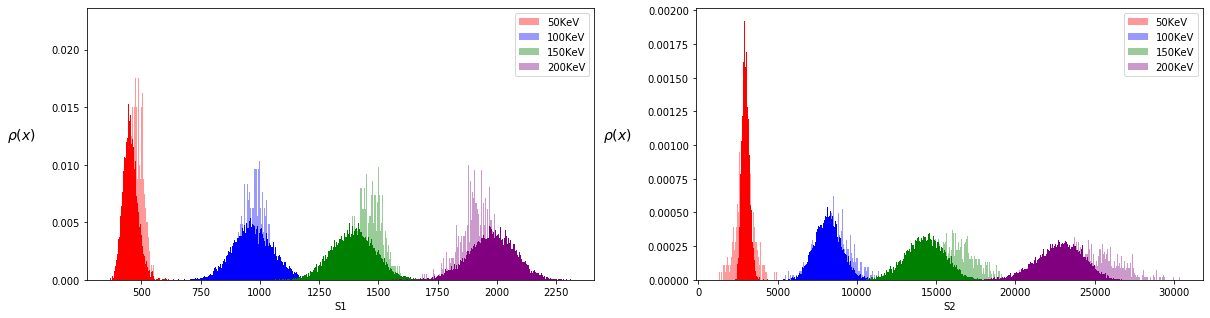

In [0]:
#Print the predicted for a range
final_gc = load_model("2D_s1_s2.h5", compile = False)
masses = [50.,100.,150.,200.,]
fig, (ax1, ax2) = plt.subplots(1, 2)+



fig.set_figheight(5)
fig.set_figwidth(20)

colors=['red','blue','green','purple']


ax1.hist(train_DS_s1ene_50*div1, density = True, bins = 205, alpha = 0.4, label = "50KeV",color = colors[0])
ax1.hist(train_DS_s1ene_100*div1, density = True, bins = 205, alpha = 0.4, label = "100KeV",color = colors[1])
ax1.hist(train_DS_s1ene_150*div1, density = True, bins = 205, alpha = 0.4, label = "150KeV",color = colors[2])
ax1.hist(train_DS_s1ene_200*div1, density = True, bins = 205, alpha = 0.4, label = "200KeV",color = colors[3])

ax2.hist(train_DS_s2ene_50*div2,density = True, bins = 205, alpha = 0.4, label = "50KeV",color = colors[0])
ax2.hist(train_DS_s2ene_100*div2, density = True, bins = 205, alpha = 0.4, label = "100KeV",color = colors[1])
ax2.hist(train_DS_s2ene_150*div2, density = True, bins = 205, alpha = 0.4, label = "150KeV",color = colors[2])
ax2.hist(train_DS_s2ene_200*div2, density = True, bins = 205, alpha = 0.4, label = "200KeV",color = colors[3])


for i in range(len(masses)):
  hyperparams = np.full(fill_value=masses[i], shape=(100000, 1))
  z = np.random.normal(size=(10000, noise_size))
  datapoints1 = final_gc.predict([z, hyperparams])[:,0]
  datapoints2 = final_gc.predict([z, hyperparams])[:,1]
  ax1.hist(datapoints1*div1, density = True, bins = 205, color = colors[i])
  ax2.hist(datapoints2*div2, density = True, bins = 205, color = colors[i])
  ax1.legend(loc="upper right", fontsize=10)
  ax2.legend(loc="upper right", fontsize=10)
  ax2.set_xlabel("S2")
  ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
  ax1.set_xlabel("S1")
  ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")

plt.show()
  

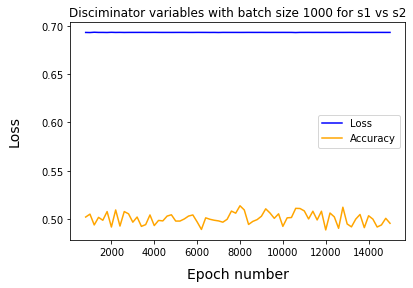

In [0]:
del epoch_no[0]
del real_loss[0]
del real_acc[0]
h3 = plt.plot(epoch_no,real_loss, color = 'blue', label = "Loss")
h4 = plt.plot(epoch_no,real_acc, color = 'orange', label = "Accuracy")
plt.xlabel("Epoch number", size=14, labelpad=10)
plt.ylabel("Loss", size=14, labelpad=20, rotation="vertical")
plt.title(f"Disciminator variables with batch size {batch_size} for s1 vs s2")
plt.legend(loc="center right", fontsize=10)
plt.show()